In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn import svm


In [2]:
loan_data = pd.read_csv("Loan Prediction.csv")

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_data.shape

(614, 13)

In [5]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
final_loan_data = loan_data

In [9]:
# Replacing missing value of Self-Employed with more frequent category

loan_data.groupby(loan_data["Self_Employed"]).count()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,,,,,,,,,,,,
No,500,491,497,487,500,500,500,482,489,463,500,500
Yes,82,78,82,80,82,82,82,79,80,75,82,82


In [10]:
final_loan_data["Self_Employed"].fillna('No', inplace = True)
final_loan_data["Self_Employed"].isnull().sum()

0

In [11]:
# Replacing missing value with MEAN for continuous variable (numerical)


final_loan_data["LoanAmount"].fillna(final_loan_data["LoanAmount"].mean(), inplace = True)
final_loan_data["Loan_Amount_Term"].fillna(final_loan_data["Loan_Amount_Term"].mean(), inplace = True)

In [12]:
# Replacing missing value with MODE for categorical variable

final_loan_data["Gender"].fillna(final_loan_data["Gender"].mode()[0], inplace = True)
final_loan_data["Married"].fillna(final_loan_data["Married"].mode()[0], inplace = True)
final_loan_data["Dependents"].fillna(final_loan_data["Dependents"].mode()[0], inplace = True)
final_loan_data["Credit_History"].fillna(final_loan_data["Credit_History"].mode()[0],inplace = True)

In [13]:
final_loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
final_loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
# Dependent column values
final_loan_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
# replacing the value of 3+ to 4
final_loan_data = final_loan_data.replace(to_replace='3+', value=4)

### Data Analysis and Visualization

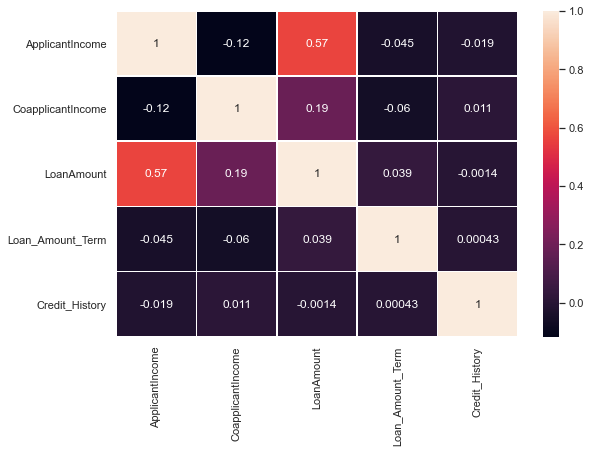

In [17]:
sns.set_theme()
data = final_loan_data.corr()
plt.subplots(figsize = (9,6))
sns.heatmap(data, annot = True, linewidth = 0.5)
plt.show()

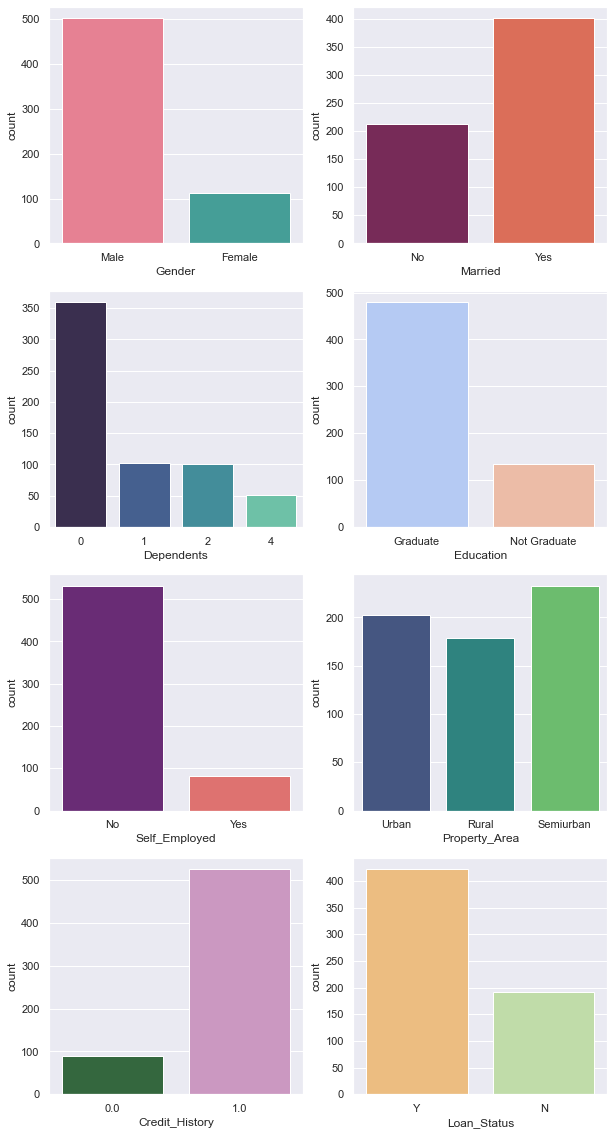

In [18]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

fig, ax = plt.subplots(4,2, figsize= (10,20))
sns.countplot("Gender", data = final_loan_data, ax = ax[0][0], palette="husl")
sns.countplot("Married", data = final_loan_data,ax = ax[0][1], palette = "rocket")
sns.countplot("Dependents", data = final_loan_data, ax = ax[1][0], palette = "mako")
sns.countplot("Education", data = final_loan_data, ax = ax[1][1], palette = "coolwarm")
sns.countplot("Self_Employed", data = final_loan_data, ax = ax[2][0], palette = "magma")
sns.countplot("Property_Area", data = final_loan_data, ax = ax[2][1], palette = "viridis")
sns.countplot("Credit_History", data = final_loan_data, ax = ax[3][0], palette = "cubehelix")
sns.countplot("Loan_Status", data = final_loan_data, ax = ax[3][1], palette = "Spectral")
plt.show()

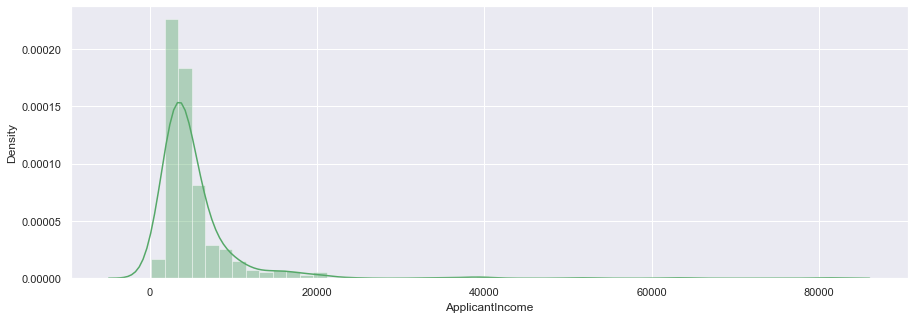

In [19]:
plt.subplots(figsize = (15,5))
sns.distplot(final_loan_data["ApplicantIncome"], color = "g", kde = True)
plt.show()

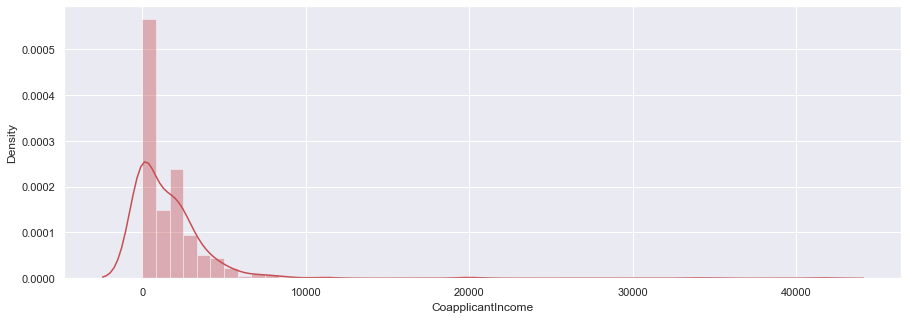

In [20]:
plt.subplots(figsize = (15,5))
sns.distplot(final_loan_data["CoapplicantIncome"], color = "r", kde = True)
plt.show()

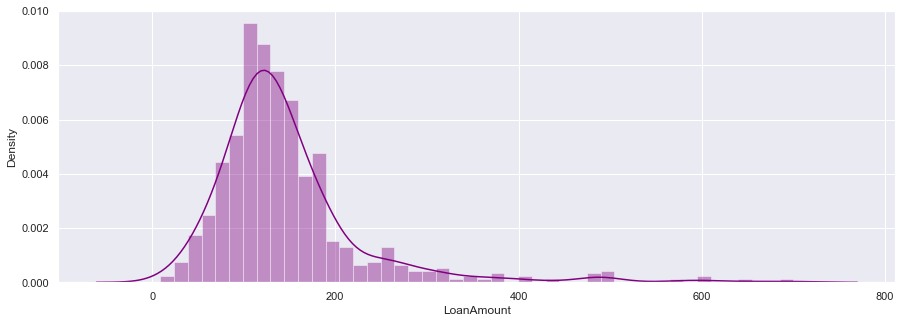

In [21]:
plt.subplots(figsize = (15,5))
sns.distplot(final_loan_data["LoanAmount"], color = "purple", kde = True)
plt.show()

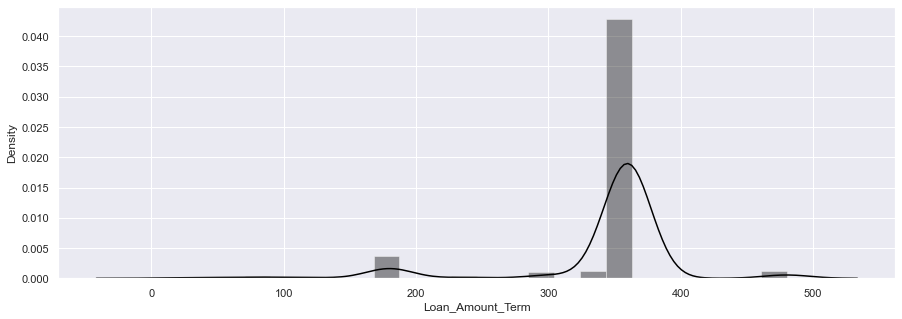

In [22]:
plt.subplots(figsize = (15,5))
sns.distplot(final_loan_data["Loan_Amount_Term"], color = "black", kde = True)
plt.show()

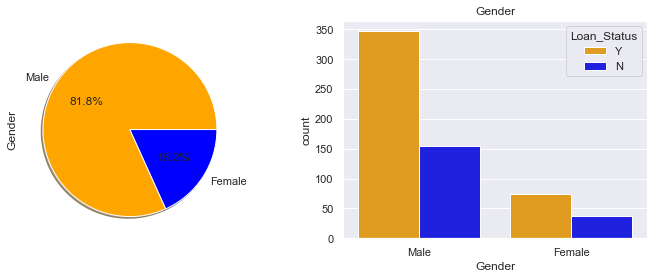

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
colors = ["orange", "blue"]
final_loan_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, colors = colors )

plt.subplot(1,2,2)
sns.countplot(x='Gender',hue = "Loan_Status", data=final_loan_data, palette=colors)
final_loan_data['Gender'].value_counts()
plt.title("Gender")
plt.show()

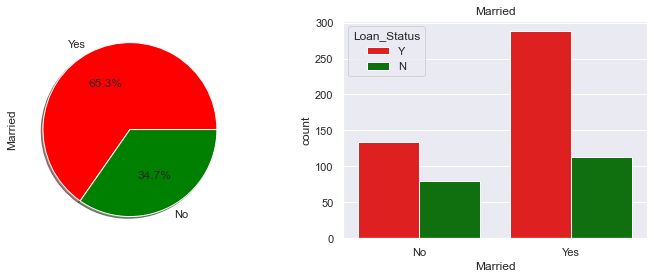

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
colors = ["red", "green"]
final_loan_data['Married'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, colors = colors )

plt.subplot(1,2,2)
sns.countplot(x='Married',hue = "Loan_Status", data=final_loan_data, palette=colors)
final_loan_data['Married'].value_counts()
plt.title("Married")

plt.show()

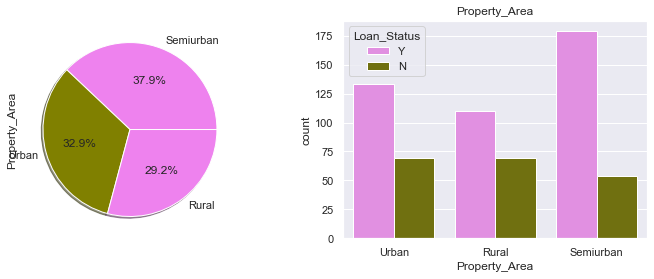

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
colors = ["violet", "olive"]
final_loan_data['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, colors = colors )

plt.subplot(1,2,2)
sns.countplot(x='Property_Area',hue = "Loan_Status", data=final_loan_data, palette=colors)
final_loan_data['Property_Area'].value_counts()
plt.title("Property_Area")

plt.show()

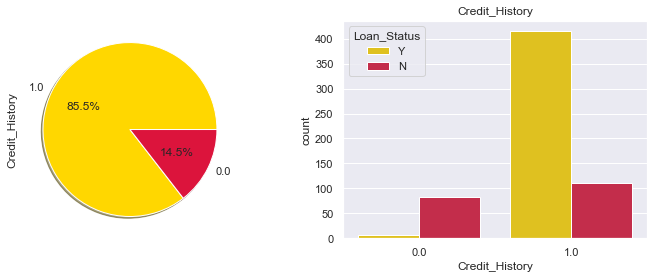

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
colors = ["gold", "crimson"]
final_loan_data['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, colors = colors )

plt.subplot(1,2,2)
sns.countplot(x='Credit_History',hue = "Loan_Status", data=final_loan_data, palette=colors)
final_loan_data['Credit_History'].value_counts()
plt.title("Credit_History")

plt.show()

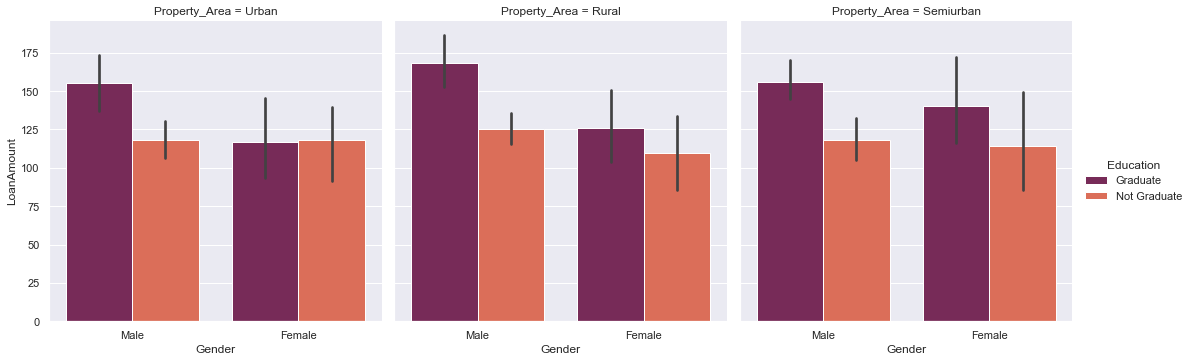

In [27]:
sns.catplot(x='Gender',y='LoanAmount',kind='bar',data=final_loan_data,col='Property_Area',hue='Education',palette = "rocket")
plt.show()

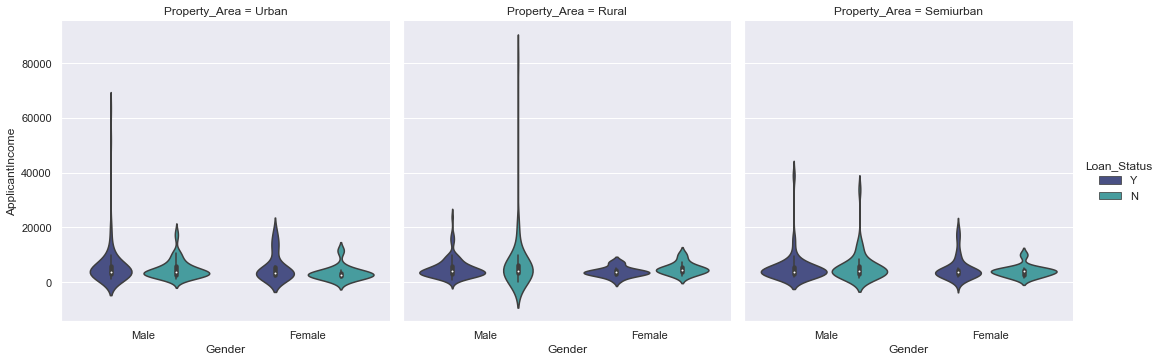

In [28]:
sns.catplot(x='Gender',y='ApplicantIncome',kind='violin',data=final_loan_data,col='Property_Area',hue='Loan_Status', palette = "mako")
plt.show()

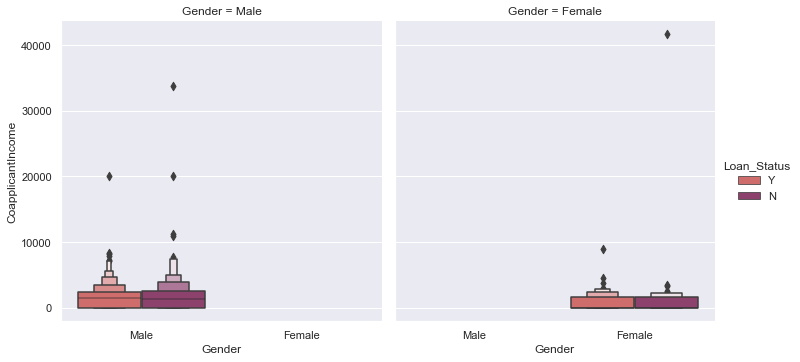

In [29]:
sns.catplot(x='Gender',y='CoapplicantIncome',kind="boxen",data=final_loan_data,col='Gender',hue='Loan_Status', palette = "flare")
plt.show()

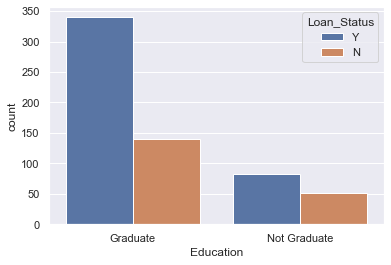

In [30]:
sns.countplot(x = "Education", hue = "Loan_Status", data = final_loan_data)
plt.show()

### Converting Categorical Value to Numerical Value

In [31]:
final_loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [32]:
final_loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [33]:
final_loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Train Test Split

In [34]:
X = final_loan_data.drop(columns = ["Loan_ID", "Loan_Status"], axis = 1)
y = final_loan_data["Loan_Status"]

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [36]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.10)

In [37]:
print(X_train.shape, X_test.shape)

(552, 11) (62, 11)


In [38]:
model = svm.SVC(kernel = "linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
pred = model.predict(X_train)
accuracy = accuracy_score(pred, y_train)

In [40]:
print('Accuracy on training data : ', accuracy)

Accuracy on training data :  0.8115942028985508


In [41]:
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(test_pred, y_test)

In [42]:
print('Accuracy on training data : ', test_accuracy)

Accuracy on training data :  0.7903225806451613


In [43]:
input_data = (1,1,1,1,0,4583,1508,128,360,1,0)

input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)
predictions = model.predict(std_data)

print(predictions)

if (predictions[0] == 0):
    print("You are eligible for Loan Application")
else:
    print("Sorry you are not eligible for Loan Application")

[[ 0.47234264  0.72881553  0.14245922  0.52836225 -0.39260074 -0.13441195
  -0.03873155 -0.21927331  0.27985054  0.41173269 -1.31851281]]
[1]
Sorry you are not eligible for Loan Application


In [51]:
import pickle
file_name = "loan_prediction_model.sav"
pickle.dump(model, open(file_name, "wb"))

In [52]:
# Loading the saved model

load_model = pickle.load(open("loan_prediction_model.sav", "rb"))

In [53]:
input = load_model.predict([[1,1,1,1,0,4583,1508,128,360,1,0]])
print(input)

[1]
